In [1]:
# クラスター分析とは
# クラスラベルの情報がない状態で、特徴量の類似度や距離に基づきデータをいくつかのグループに分類する方法
# 階層的手法と非階層的手法に分類される

In [3]:
# データの距離の種類

# ミンコフスキー距離について
# マンハッタン距離やユークリッド距離を一般化したもの

# a, b間の距離を求める
import numpy as np
from scipy.spatial.distance import minkowski

a = np.array([1,1,1])
b = np.array([1,2,4])

# マンハッタン距離
manhattan_distance = minkowski(a, b, 1)
print("マンハッタン距離:{}".format(manhattan_distance))

# ユークリッド距離
euclidean_distance = minkowski(a, b, 2)
print("ユークリッド距離:{}".format(euclidean_distance))

マンハッタン距離:4.0
ユークリッド距離:3.1622776601683795


In [6]:
# マハラノビス距離について
# データ間の距離について、相関関係を考慮して求めたもの
from scipy.spatial import distance

X = np.array([[0, 0], [1, 1], [2, 2]])

# 分散共分散行列を計算
cov = np.cov(X.T)
# 分散共分散行列の逆行列を計算
cov_i = np.linalg.pinv(cov)

# 2つの標本 [1, 1] と [0, 0] のマハラノビス距離を計算する
d = distance.mahalanobis([1, 1], [0,0], cov_i)
print("マハラノビス距離:{:.2f}".format(d))

マハラノビス距離:1.00


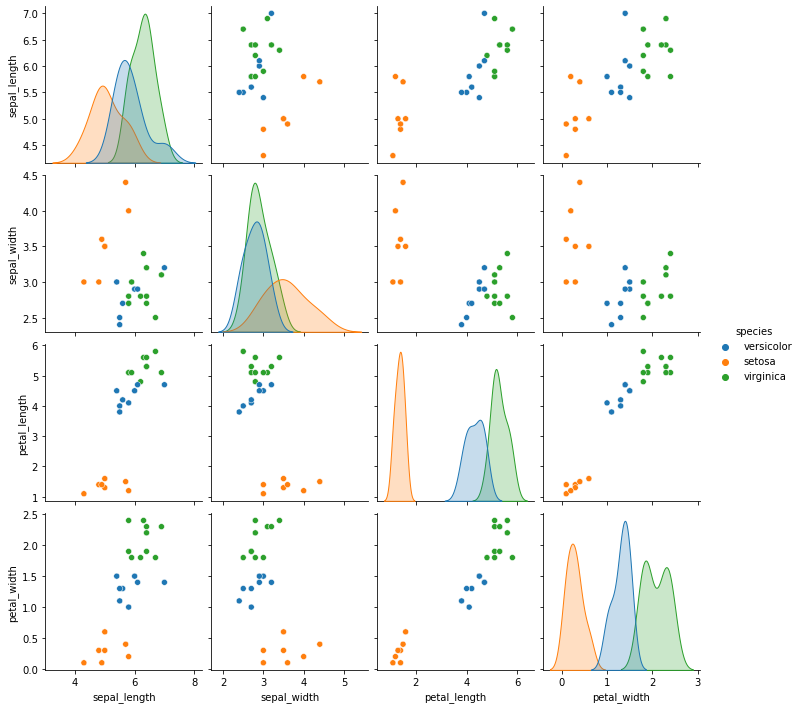

In [19]:
# 階層的手法
# 距離が近いサンプル同士を順次グループ化していき、最後に大きなクラスターにまとめ上げていく
# デンドログラムでクラスター形成のプロセスを視覚的に把握できる

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
import seaborn as sns

# データセットを準備(iris)
df = sns.load_dataset("iris")
df = df.sample(n=25)
sns.pairplot(df, hue='species')

x_df = df[["sepal_length", "sepal_width", "petal_length","petal_width"]]

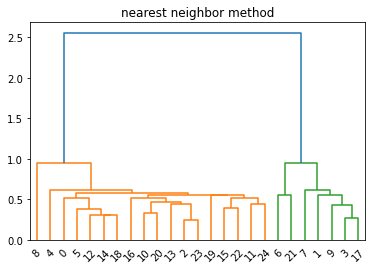

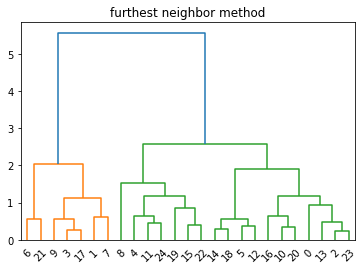

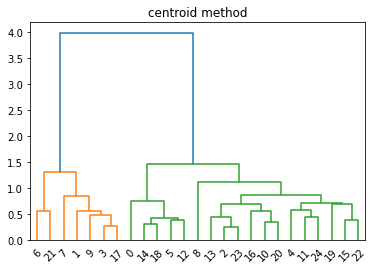

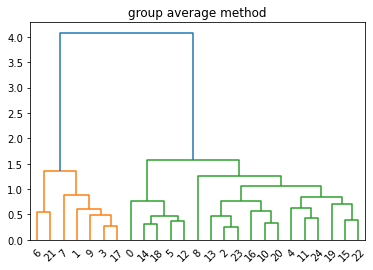

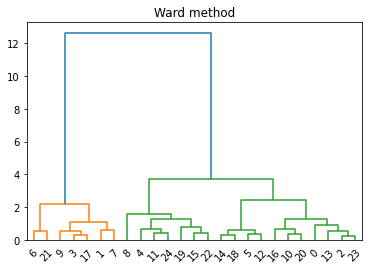

In [22]:
# 最近隣法(単リンク法、最短距離法)
# 全ての組み合わせのうち最も近い距離をクラスター間の距離として用いる
clu = linkage(x_df, method='single', metric='euclidean')
dendrogram(clu)
plt.title("nearest neighbor method")
plt.show()

# 最遠隣法(最長距離法)
# 全ての組み合わせのうち最も遠い距離をクラスター間の距離として用いる
clu = linkage(x_df, method='complete', metric='euclidean')
dendrogram(clu)
plt.title("furthest neighbor method")
plt.show()

# 重心法(セントロイド法)
# それぞれのクラスター間の重心間の距離をクラスター間の距離として用いる
clu = linkage(x_df, method='centroid', metric='euclidean')
dendrogram(clu)
plt.title("centroid method")
plt.show()

# 群平均法
# 全ての組み合わせの平均法をクラスター間の距離として用いる
clu = linkage(x_df, method='average', metric='euclidean')
dendrogram(clu)
plt.title("group average method")
plt.show()

# ウォード法
# それぞれのデータの平方和（それぞれのデータと平均値の差を二乗和）を求め、平方和が小さなものからクラスタを作っていく手法
clu = linkage(x_df, method='ward', metric='euclidean')
dendrogram(clu)
plt.title("Ward method")
plt.show()

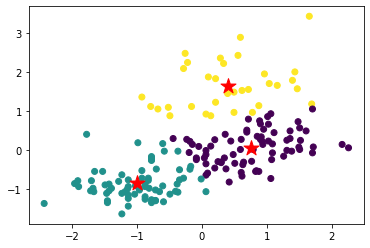

In [7]:
# 非階層的手法
# 全てのサンプルをあらかじめ指定したクラスター数に分類する
# クラスターを階層的に捉える必要がないときに有用な手法
# 代表的な手法としてK-means法がある

# K-means法とは
# クラスターの平均を用いて、あらかじめ決められたクラスター数に分類する手法。以下のアルゴリズムで実行される
# 1.クラスタの中心の初期値をk個決める
# 2.全てのサンプルとk個のクラスタとの中心距離を求め、最も近いクラスタに分類する
# 3.形成されたk個のクラスタの中心を求める
# 4.中心が変化しなくなるまで2と3の工程を繰り返す

from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
import numpy as np 
import pandas as pd

# ワインデータを使用
wine_data = datasets.load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

X=df[["alcohol","color_intensity"]]
sc = preprocessing.StandardScaler() # クラスタリング用にデータを整形
sc.fit(X)
X_norm = sc.transform(X)

# クラスタリング
cls = KMeans(n_clusters=3)
result = cls.fit(X_norm)

# 結果を可視化
plt.scatter(X_norm[:,0],X_norm[:,1], c=result.labels_)
plt.scatter(result.cluster_centers_[:,0],result.cluster_centers_[:,1],s=250, marker='*',c='red')
plt.show()

In [ ]:
# 混合分布とEMアルゴリズムによる非階層的クラスタリング
# データの生成モデルに混合分布を仮定することによるクラスタリングも可能